## **Analysis Of Default Data**

# **Context**

> Financial institutions that grant loans are concerned with the possible default of customers. Knowing how to measure risk and understand what makes a customer default is essential for business success. The database was provided by EBAC teacher [André Perez](https://www.linkedin.com/in/andremarcosperez/).


> We will explorer the credit data present in the dataset, which is in CSV format and contains information about customers of a financial institution. We will seek to understand why a customer fails to honor their debts based on the behavior of attributes such as salary, education and financial transactions.


> The attribute of interest (default) is known as response variable or dependent variable. The other attributes seek to explain it (age, salary, education, etc.) and are known as explanatory, independent or predictive variables. We will analyze the attributes of defaulters to understand what makes a person default on a loan. If we know how to capture this behavior, we will enable preventive actions to be taken, avoiding the customer from defaulting.


> **Attribute Description:**



| Coluna  | Descrição |
| ------- | --------- |
| id      | account number |
| default | indicates whether the customer is adimplent (0) or defaulter (1) |
| idade   | age |
| sexo    | gender |
| dependentes | dependents |
| escolaridade | education |
| estado_civil | marital status |
| salario_anual | annual salary |
| tipo_cartao | card category: blue, silver, gold e platinum |
| meses_de_relacionamento | number of months since the account was opened |
| qtd_produtos | quantity of contracted products |
| iteracoes_12m | number of iterations with the customer in the last year |
| meses_inativo_12m | number of months the customer was inactive in the last year |
| limite_credito | credit card limit value |
| valor_transacoes_12m | total sum of value of credit card transactions in the last year |
| qtd_transacoes_12m | total amount of credit card transactions in the last year |


# **Exploratory Analysis**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [4]:
#to see the df
df.head(6)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24


# **Structure**

In [5]:
tot_columns = df.shape[1]
tot_lines = df.shape[0]
tot_lines_adimplent = df[df['default'] == 0].shape[0]
tot_lines_defaulter = df[df['default'] == 1].shape[0]

print(f'The total number of columns in the dataset is {tot_columns}')
print(f'The total number of lines in the dataset is {tot_lines}, which {tot_lines_adimplent} are adimplent and {tot_lines_defaulter} are Defaulters')
print(f'The proportion of clients in good standing is {round((100 * tot_lines_adimplent) / tot_lines, 2)}%')
print(f'The proportion of defaulting customers is {round((100 * tot_lines_defaulter) / tot_lines, 2)}%')

The total number of columns in the dataset is 16
The total number of lines in the dataset is 10127, which 8500 are adimplent and 1627 are Defaulters
The proportion of clients in good standing is 83.93%
The proportion of defaulting customers is 16.07%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [7]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [8]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [9]:
#transforming the columns "limite_credito" and "valor_transacoes_12m" in float
#remove "." and replace "," to "."

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace('.','').replace(',','.')))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace('.','').replace(',','.')))
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [10]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [11]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [12]:
#see which columns have missing data

df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [13]:
#see if the missing data will make a big difference

def stats_missing_data(df: pd.DataFrame) -> None:
  
  stats_missing_data = []
  for col in df.columns:
    if df[col].isna().any():
      qty,_ = df[df[col].isna()].shape
      tot,_ = df.shape
      dict_missing_data = {col: {'quantity': qty, 'percentage': round(100 * qty/tot, 2)}}
      stats_missing_data.append(dict_missing_data)

  for stat in stats_missing_data:
    print(stat)

In [14]:
#missing data
stats_missing_data(df=df)

{'escolaridade': {'quantity': 1519, 'percentage': 15.0}}
{'estado_civil': {'quantity': 749, 'percentage': 7.4}}
{'salario_anual': {'quantity': 1112, 'percentage': 10.98}}


In [15]:
#missing data from adimplent
stats_missing_data(df=df[df['default'] == 0])

{'escolaridade': {'quantity': 1263, 'percentage': 14.86}}
{'estado_civil': {'quantity': 620, 'percentage': 7.29}}
{'salario_anual': {'quantity': 925, 'percentage': 10.88}}


In [16]:
#missing data from defaulter
stats_missing_data(df=df[df['default'] == 1])

{'escolaridade': {'quantity': 256, 'percentage': 15.73}}
{'estado_civil': {'quantity': 129, 'percentage': 7.93}}
{'salario_anual': {'quantity': 187, 'percentage': 11.49}}


The missing data doesn't make much diference, because the results of the percentage are close, then it can be excluded from the spreadsheet.

In [17]:
df.dropna(inplace=True)

In [18]:
#análising the data again

tot_new_columns = df.shape[1]
tot_new_lines = df.shape[0]
tot_new_lines_adimplent = df[df['default'] == 0].shape[0]
tot_new_lines_defaulter = df[df['default'] == 1].shape[0]

print(f'The total of columns in the dataset is {tot_new_columns}.')
print(f'The total number of lines in the dataset is {tot_new_lines}, which {tot_new_lines_adimplent} are adimplent and {tot_new_lines_defaulter} are Defaulters')

The total of columns in the dataset is 16.
The total number of lines in the dataset is 7081, which 5968 are adimplent and 1113 are Defaulters


In [19]:
print(f'The proportion of clients in good standing is {round((100 * tot_lines_adimplent) / tot_lines, 2)}%')
print(f'The new proportion of clients in good standing is {round((100 * tot_new_lines_adimplent) / tot_new_lines, 2)}%\n')
print(f'The proportion of defaulting customers is {round((100 * tot_lines_defaulter) / tot_lines, 2)}%')
print(f'The new proportion of defaulting customers is {round((100 * tot_new_lines_defaulter) / tot_new_lines, 2)}%')

The proportion of clients in good standing is 83.93%
The new proportion of clients in good standing is 84.28%

The proportion of defaulting customers is 16.07%
The new proportion of defaulting customers is 15.72%


**Analyzing with vizualization**

In [20]:
#adimplent client
df_adimplent = df[df['default'] == 0]

In [21]:
#defaulter client
df_defaulter = df[df['default'] == 1]

In [22]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


# **Graphics**



> Sexo / Gender



According to the Data Protection Law, we can't use gender for this analysis.




> Escolaridade / Education



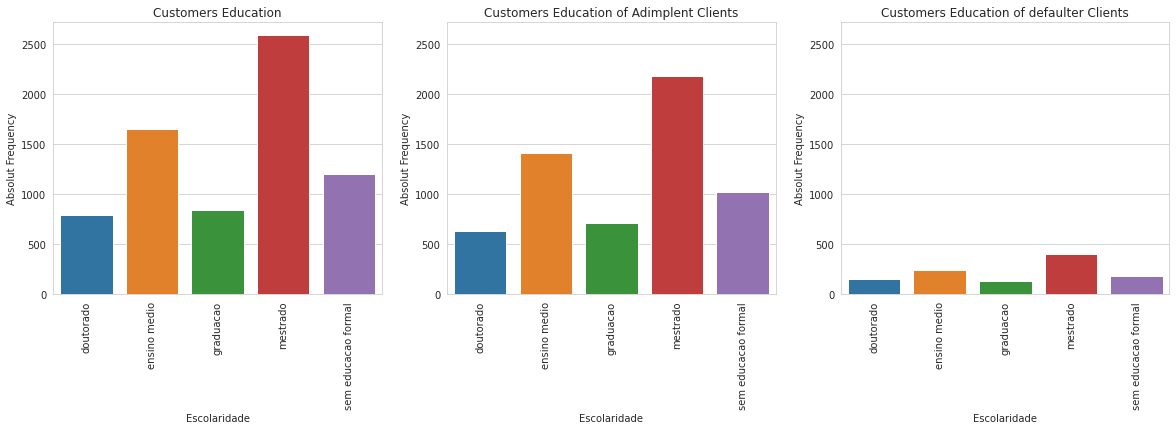

In [23]:
column = 'escolaridade'
title = ['Customers Education', 'Customers Education of Adimplent Clients', 'Customers Education of defaulter Clients']

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

picture, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolut_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y = df_to_plot['absolut_frequency'], ax = axes[axis])
  f.set(title=title[axis], xlabel=column.capitalize(), ylabel='Absolut Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()



> Estado Civil / Marital Status



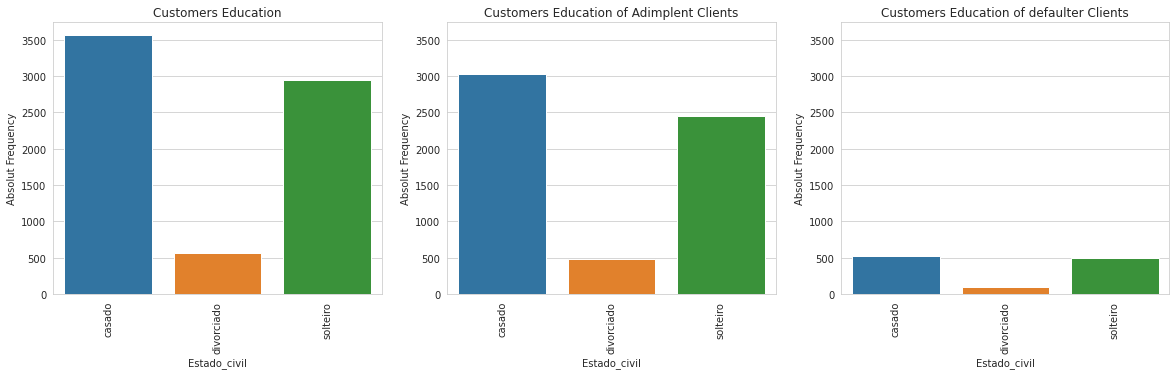

In [24]:
column = 'estado_civil'
titles = ['Cutomers Marital Status', 'Marital Status of Adimplent Customers', 'Marital Status of defaulter Customers']

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

picture, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolut_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y = df_to_plot['absolut_frequency'], ax = axes[axis])
  f.set(title=title[axis], xlabel=column.capitalize(), ylabel='Absolut Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()



> Salário Anual / Annual Salary



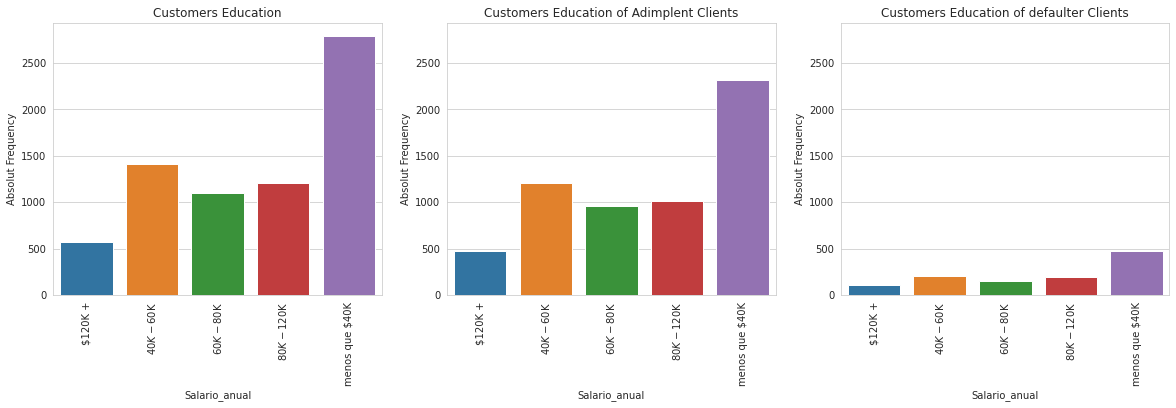

In [25]:
column = 'salario_anual'
titles = ['Customers Annual Salary', 'Annual Salary of Adimplent Customers', 'Annual Salary of Defaulter Customers']

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

picture, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolut_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y = df_to_plot['absolut_frequency'], ax = axes[axis])
  f.set(title=title[axis], xlabel=column.capitalize(), ylabel='Absolut Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()



> Tipo do Cartão / Card Type



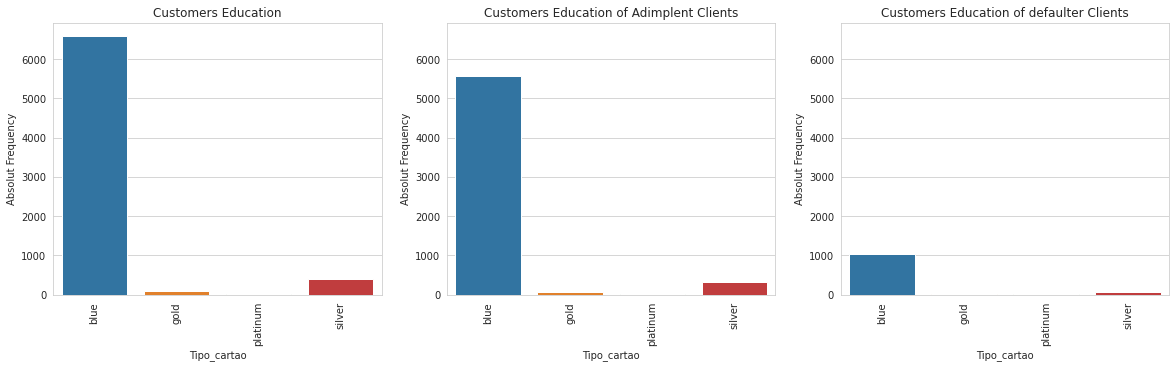

In [26]:
column = 'tipo_cartao'
titles = ['Card Category of Customers', 'Card Category of Adimplent Customers', 'Card Category of Defaulter Customers']

axis = 0
max_y = 0
max = df.select_dtypes('object').describe()[column]['freq'] * 1.1

picture, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolut_frequency'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.sort_values(by=[column], inplace=True)
  df_to_plot.sort_values(by=[column])

  f = sns.barplot(x=df_to_plot[column], y = df_to_plot['absolut_frequency'], ax = axes[axis])
  f.set(title=title[axis], xlabel=column.capitalize(), ylabel='Absolut Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

**Numerical Display**

In [27]:
df.drop(['id','default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24




> Idade / Age



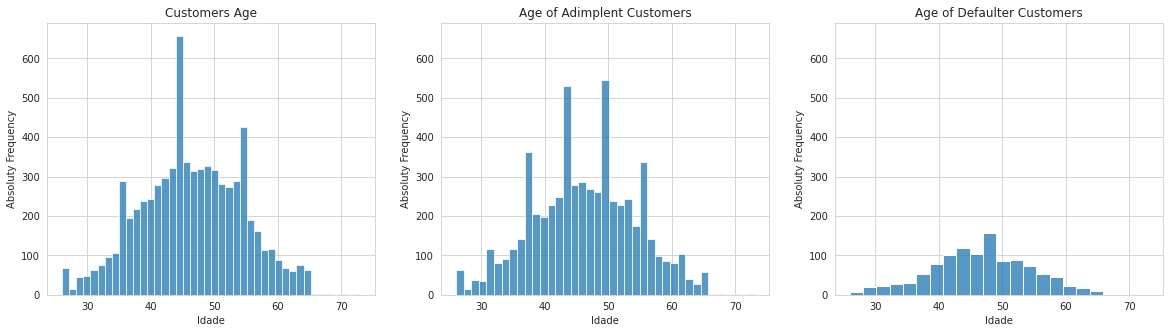

In [28]:
column = 'idade'
titles = ['Customers Age', 'Age of Adimplent Customers', 'Age of Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

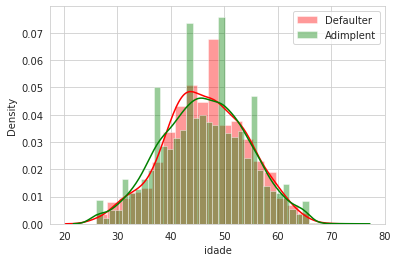

In [29]:
sns.distplot(df['idade'][df['default'] == 1], kde=True, color='red', label='Defaulter')
sns.distplot(df['idade'][df['default'] == 0], kde=True, color='green', label='Adimplent')
plt.legend()



> Dependentes / Dependents



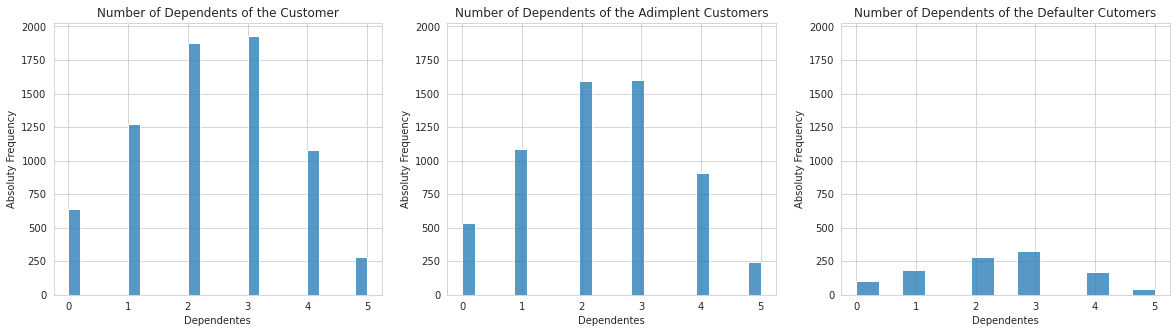

In [30]:
column = 'dependentes'
titles = ['Number of Dependents of the Customer', 'Number of Dependents of the Adimplent Customers','Number of Dependents of the Defaulter Cutomers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

> Meses de Relacionamento / Number of Months Since The Account Was Opened

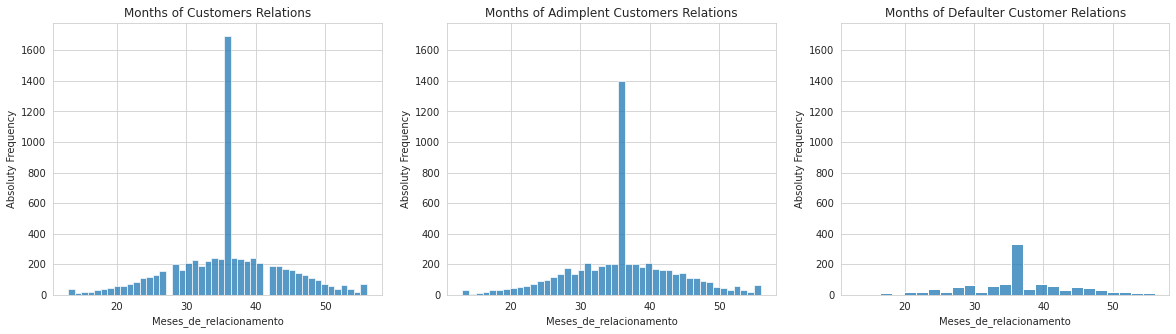

In [31]:
column = 'meses_de_relacionamento'
titles = ['Months of Customers Relations', 'Months of Adimplent Customers Relations', 'Months of Defaulter Customer Relations']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

> Quantidade de Produto / Product Quantity

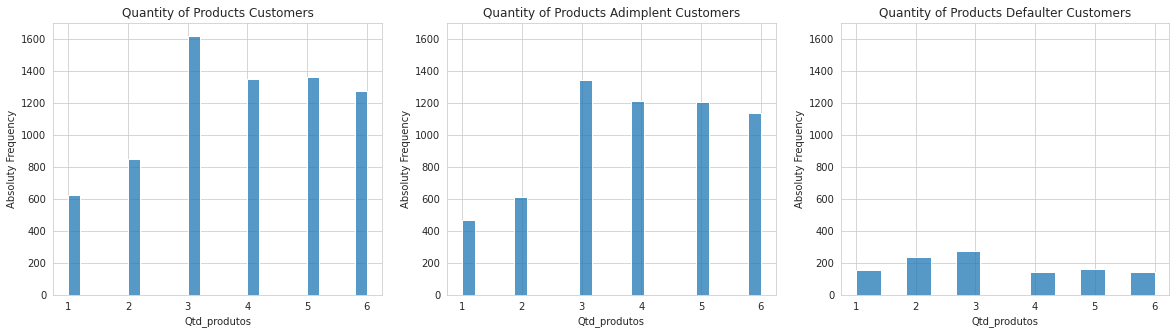

In [32]:
column = 'qtd_produtos'
titles = ['Quantity of Products Customers', 'Quantity of Products Adimplent Customers', 'Quantity of Products Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

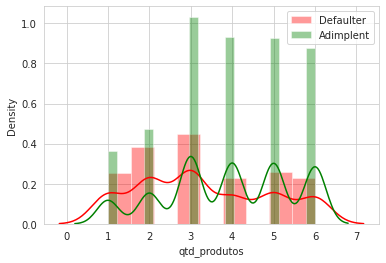

In [33]:
sns.distplot(df['qtd_produtos'][df['default'] == 1], kde=True, color='red', label='Defaulter')
sns.distplot(df['qtd_produtos'][df['default'] == 0], kde=True, color='green', label='Adimplent')
plt.legend()

> Interações nos Ultimos 12 Meses / Number of Iterations With the Customer in the 12 Mounths

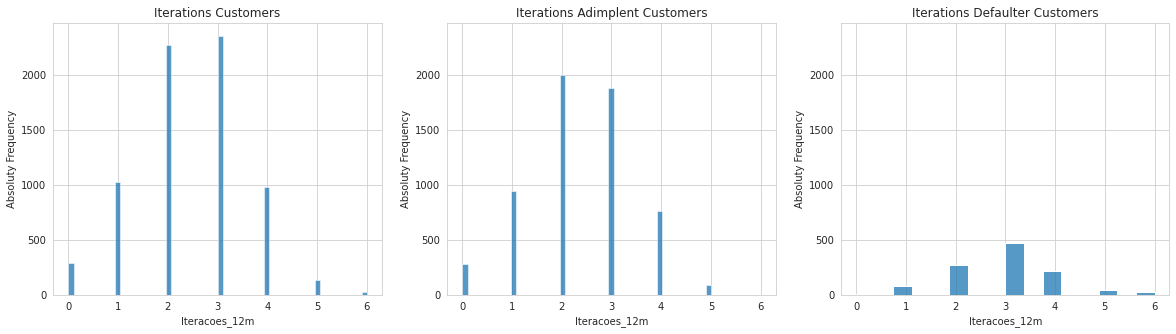

In [33]:
column = 'iteracoes_12m'
titles = ['Iterations Customers', 'Iterations Adimplent Customers', 'Iterations Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

> Meses Inativos nos Ultimos 12 Meses / Number of Months the Customer was Inactive in the Last 12 Months

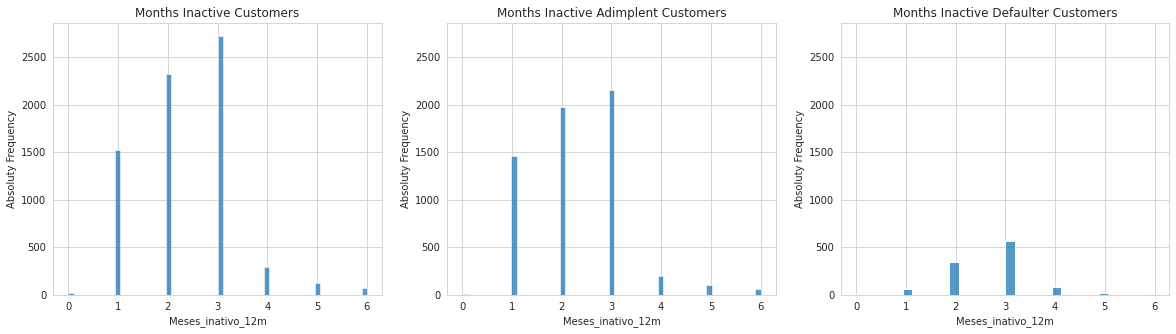

In [34]:
column = 'meses_inativo_12m'
titles = ['Months Inactive Customers', 'Months Inactive Adimplent Customers', 'Months Inactive Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()



> Limite de Crédito / Credit Limit



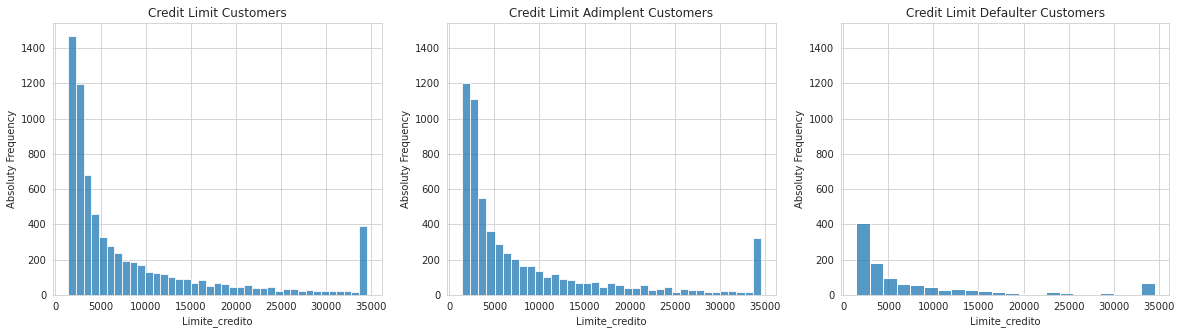

In [35]:
column = 'limite_credito'
titles = ['Credit Limit Customers', 'Credit Limit Adimplent Customers', 'Credit Limit Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

> Quantidades de Transações nos Ultimos 12 Meses / Transaction Quantities in the Last 12 Months

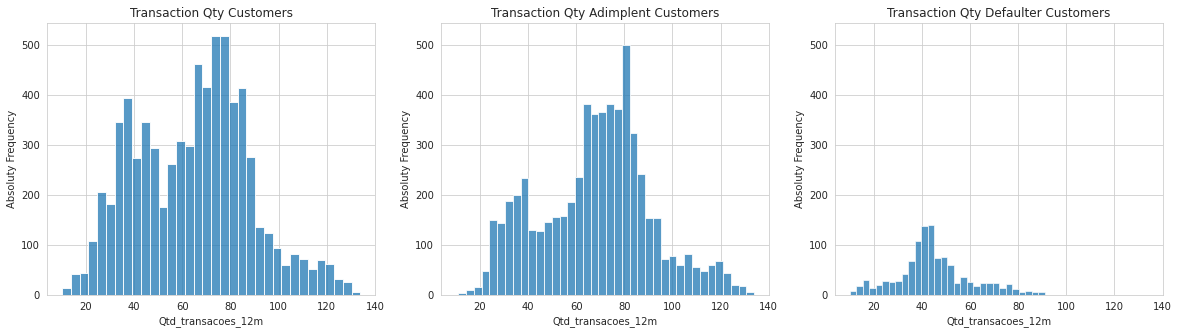

In [36]:
column = 'qtd_transacoes_12m'
titles = ['Transaction Qty Customers', 'Transaction Qty Adimplent Customers', 'Transaction Qty Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

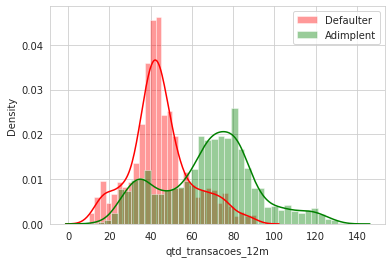

In [37]:
sns.distplot(df['qtd_transacoes_12m'][df['default'] == 1], kde=True, color='red', label='Defaulter')
sns.distplot(df['qtd_transacoes_12m'][df['default'] == 0], kde=True, color='green', label='Adimplent')
plt.legend()

> Valor das Transacoes nos Ultimos 12 Meses / Value of Transactions in the Last 12 Months

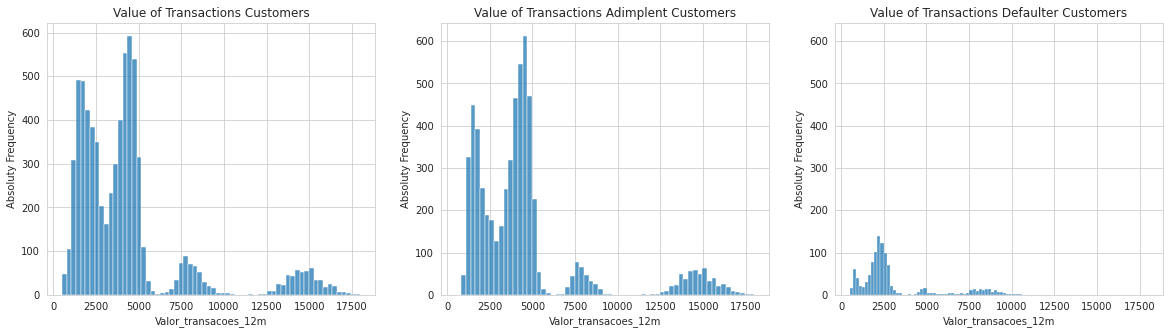

In [38]:
column = 'valor_transacoes_12m'
titles = ['Value of Transactions Customers', 'Value of Transactions Adimplent Customers', 'Value of Transactions Defaulter Customers']

axis = 0
max_y = 0
picture, axes = plt.subplots(1,3, figsize=(20,5), sharex=True)

for dataframe in [df, df_adimplent, df_defaulter]:

  f = sns.histplot(x=column, data = dataframe, stat='count', ax=axes[axis])
  f.set(title=titles[axis], xlabel=column.capitalize(), ylabel='Absoluty Frequency')
  
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  axis += 1

picture.show()

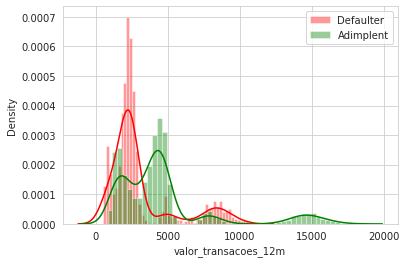

In [39]:
sns.distplot(df['valor_transacoes_12m'][df['default'] == 1], kde=True, color='red', label='Defaulter')
sns.distplot(df['valor_transacoes_12m'][df['default'] == 0], kde=True, color='green', label='Adimplent')
plt.legend()

**Comparing**

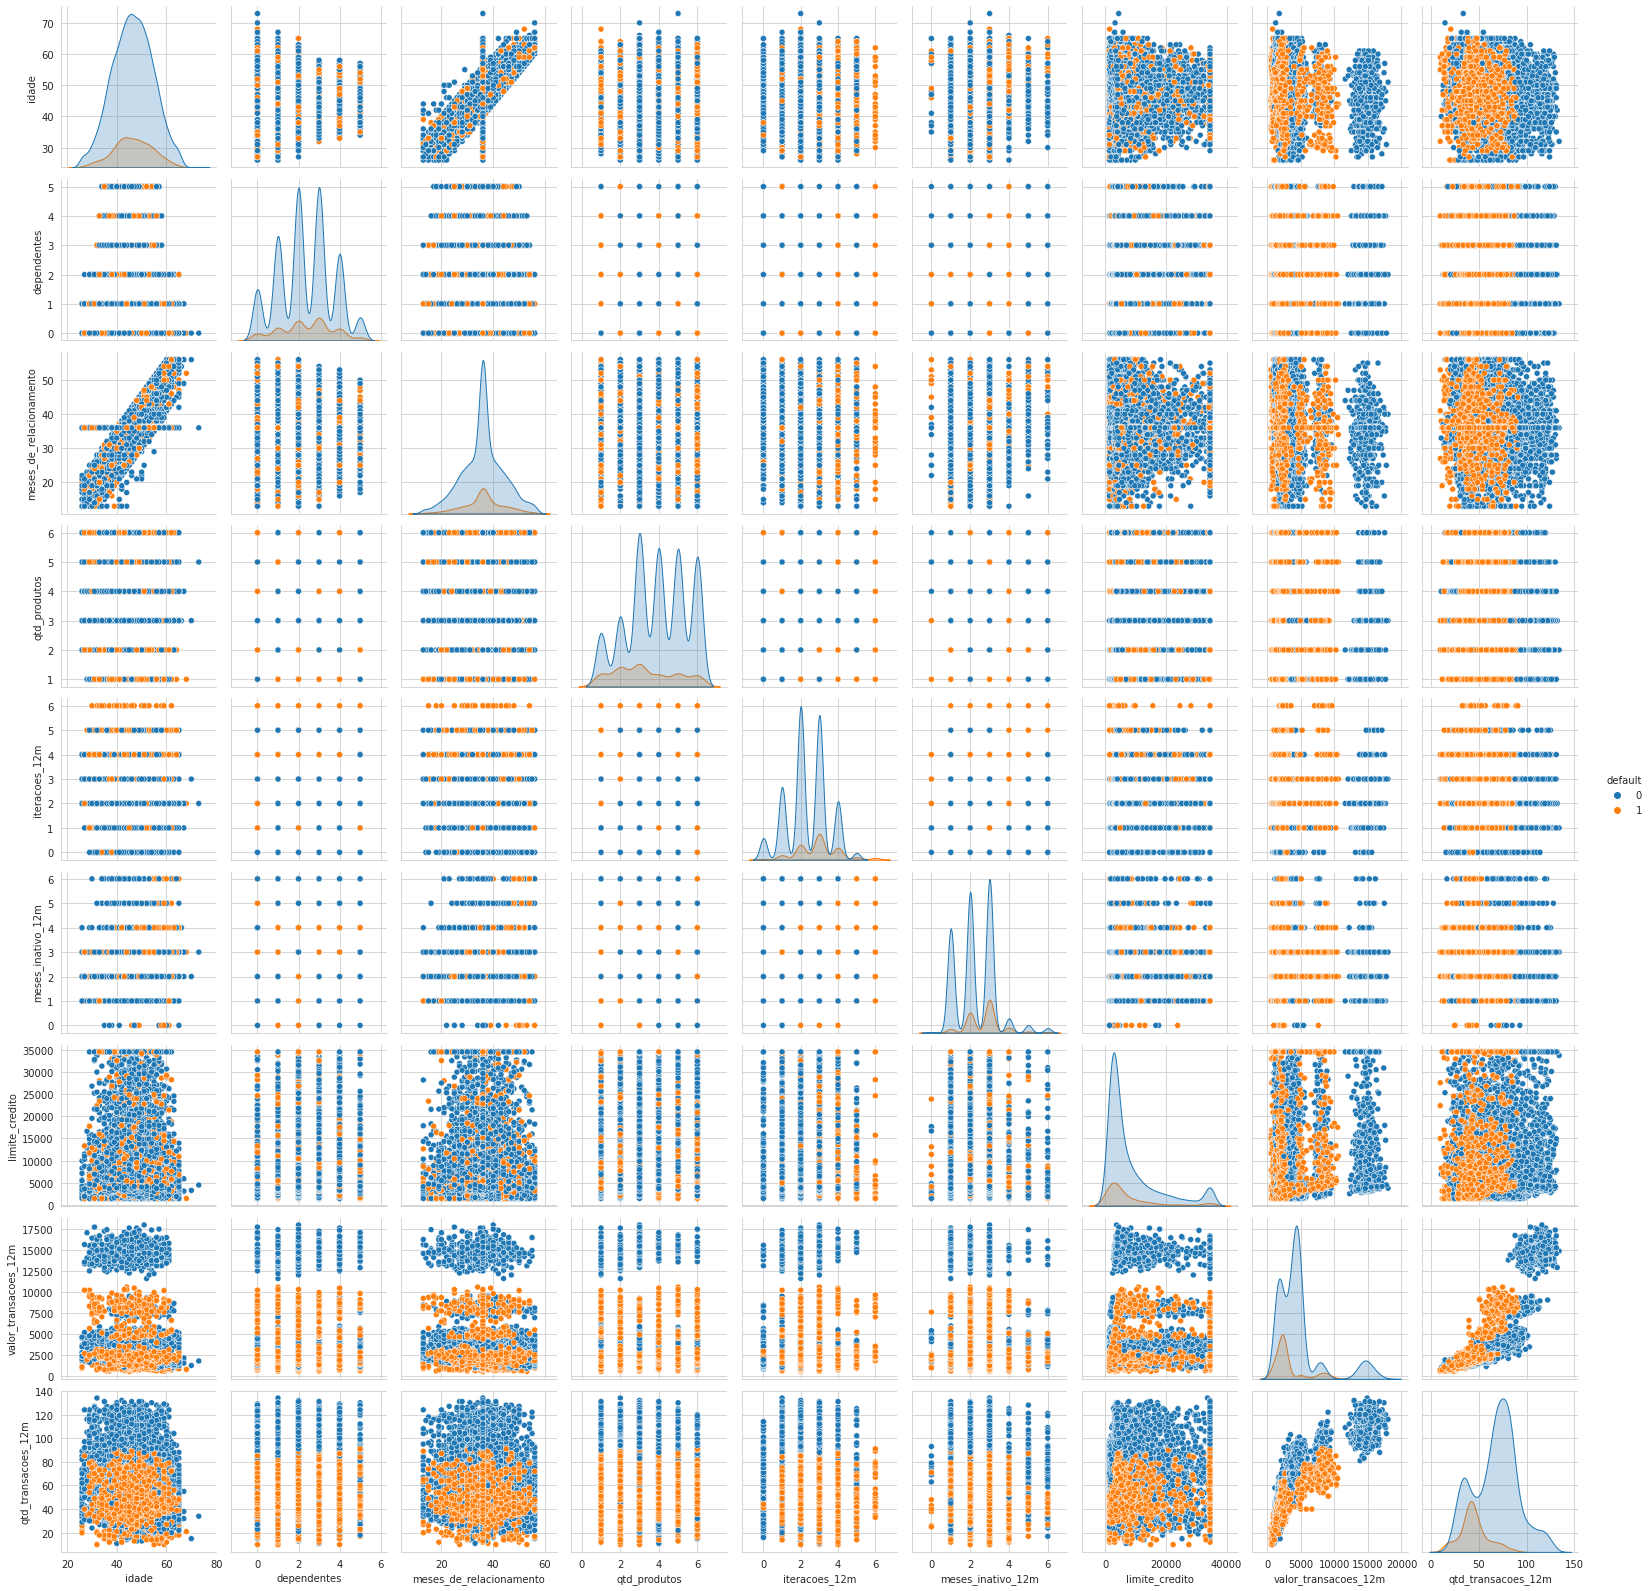

In [40]:
sns.pairplot(df.drop('id',axis=1), hue='default')
plt.show()

# **Conclusion**

Analyzing the graphs, the attributes with the highest probability of default are:
1. qtd_transacoes_12m(transaction quantity in the last 12 months). We can observe the high level of default by customers who have between 10 and 50 transactions in the last 12 months.
2. valor_transacoes_12m(Total sum of value of credit card transactions in the last 12 months). The defaulter customers are located between 500(reais) and 3000(reais) also 7500(reais) and 10000(reais).
3. qtd_produtos(quantity of contracted products). The customers who have 1 or 2 contracted products has a higher probability of being defaulter.